In [1]:
%matplotlib inline
import numpy as np
import sklearn
from sklearn import linear_model, metrics, datasets
from sklearn.svm import LinearSVR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import pandas as pd
from matplotlib import pyplot as plt
from mylibs import transform as tf
from mylibs import resample as rs

### 01. Crie os seguintes arquivos com extensão .py e implemente os métodos definidos para cada um deles:
* transform.py
    - standardize
    - normalize
* resample.py
    - split_k_fold(n_elem, n_splits=3, shuffle=True, seed=0)
    - n_elem - número total de elementos.
    - n_split - número de folds. Mínimo: 2.
    - shuffle - aleatoriza a ordem dos dados (True) ou não (False).
    - seed - determina uma semente para geração de números aleatórios ou não (None).
    - Retorno: 2 arrays (idx_train e idx_test), cada um com n_splits elementos: 
    - um com os índices de treino. Exemplo para n_splits=3, teremos idx_train[0], idx_train[1] e idx_train[2].
    - um com os índices de teste. Exemplo para n_splits=3, teremos idx_test[0], idx_test[1] e idx_test[2].

In [2]:
np.random.seed(0)
x = np.random.rand(20) # 20 valores
x = (x * 100).round(2) # valores até 100
x = np.resize(x, (20, 1))

In [3]:
tf.normalize(x)

array([[0.56025437],
       [0.73661897],
       [0.61748808],
       [0.55612083],
       [0.42766296],
       [0.66316905],
       [0.44239534],
       [0.92379438],
       [1.        ],
       [0.38494966],
       [0.81770005],
       [0.53916269],
       [0.58060413],
       [0.95961844],
       [0.05384208],
       [0.0709062 ],
       [0.        ],
       [0.86104928],
       [0.80339163],
       [0.90068892]])

In [4]:
tf.standardize(x)

array([[-0.11870903],
       [ 0.48434953],
       [ 0.07699507],
       [-0.13284322],
       [-0.5720902 ],
       [ 0.23319593],
       [-0.52171451],
       [ 1.12437442],
       [ 1.38495081],
       [-0.71814345],
       [ 0.761597  ],
       [-0.19082962],
       [-0.04912535],
       [ 1.24687069],
       [-1.85032791],
       [-1.79197909],
       [-2.03443473],
       [ 0.90982474],
       [ 0.71267098],
       [ 1.04536795]])

In [5]:
test, train = rs.slipt_k_fold(20, 5, True, 2)

In [6]:
train

[array([ 2,  8,  6, 19, 15,  4, 16, 12,  9,  1,  0,  7, 14, 17,  3, 18]),
 array([13, 11, 10,  5, 15,  4, 16, 12,  9,  1,  0,  7, 14, 17,  3, 18]),
 array([13, 11, 10,  5,  2,  8,  6, 19,  9,  1,  0,  7, 14, 17,  3, 18]),
 array([13, 11, 10,  5,  2,  8,  6, 19, 15,  4, 16, 12, 14, 17,  3, 18]),
 array([13, 11, 10,  5,  2,  8,  6, 19, 15,  4, 16, 12,  9,  1,  0,  7])]

In [7]:
test

[array([13, 11, 10,  5]),
 array([ 2,  8,  6, 19]),
 array([15,  4, 16, 12]),
 array([9, 1, 0, 7]),
 array([14, 17,  3, 18])]

### Carregando Dataset

In [8]:
data = pd.read_csv('winequality-red.csv', delimiter=';')
data.shape

(1599, 12)

In [9]:
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
407,12.0,0.39,0.66,3.0,0.093,12.0,30.0,0.99960,3.18,0.63,10.8,7
1220,10.9,0.32,0.52,1.8,0.132,17.0,44.0,0.99734,3.28,0.77,11.5,6
1200,7.7,0.57,0.21,1.5,0.069,4.0,9.0,0.99458,3.16,0.54,9.8,6
308,10.3,0.43,0.44,2.4,0.214,5.0,12.0,0.99940,3.19,0.63,9.5,6
1328,6.5,0.52,0.11,1.8,0.073,13.0,38.0,0.99550,3.34,0.52,9.3,5


In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
k = 5
idx_test, idx_train = rs.slipt_k_fold(data.shape[0], k, True, 10)

In [12]:
idx_test

[array([1455,  788,  355,  338,  433,   68,  820, 1198,  107, 1340, 1194,
         981,  101, 1034,  549, 1197,  739, 1172,  555, 1289,  735,  675,
        1486, 1107,  451, 1278, 1432, 1208,  240,  373,  643, 1053, 1512,
         691,  402,  463, 1196, 1226,  960,  218,  529,  187,  508, 1293,
         312,  322,  877,  143,  450,   15,  626,  939,  560, 1073, 1490,
         580,  905,  772,  332, 1087, 1480,  780,  315,  607, 1371,  747,
        1582,  147,  177,   32,  115,  192, 1125, 1064,  188,  158, 1082,
         969,  121,  904, 1532,  155,  599, 1162, 1538,  480,  609,  587,
         982,  499,  845,  424, 1373,  807, 1530, 1424,   75, 1300,  149,
         230,  171, 1231,  934, 1007,   27,  900,  259, 1276,  511, 1155,
         682,  742,  929, 1355, 1377, 1063, 1047,  584,  764,  270, 1014,
         746,  198,  832, 1001,  319, 1126,  874,   91,  427,  776,   16,
        1405, 1446,  543,  848, 1408, 1586,  627, 1274, 1042, 1429, 1351,
         784, 1334,  754,  290,  592, 

In [13]:
idx_train

[array([1084,  741,  520, ...,  975,  888,  951]),
 array([1455,  788,  355, ...,  975,  888,  951]),
 array([1455,  788,  355, ...,  975,  888,  951]),
 array([1455,  788,  355, ...,  975,  888,  951]),
 array([1455,  788,  355, ..., 1502,  266, 1569])]

In [14]:
dataset = data.values
print(dataset)

[[ 7.4    0.7    0.    ...  0.56   9.4    5.   ]
 [ 7.8    0.88   0.    ...  0.68   9.8    5.   ]
 [ 7.8    0.76   0.04  ...  0.65   9.8    5.   ]
 ...
 [ 6.3    0.51   0.13  ...  0.75  11.     6.   ]
 [ 5.9    0.645  0.12  ...  0.71  10.2    5.   ]
 [ 6.     0.31   0.47  ...  0.66  11.     6.   ]]


In [15]:
X = dataset[:, :11]
y = dataset[:, 11]

In [16]:
sgd = linear_model.SGDRegressor(max_iter=10)

total_sgd = 0.0
X_norm = tf.standardize(X)
for i in range(k):
    sgd.fit(X_norm[idx_train[i]],y[idx_train[i]])
    y_pred = sgd.predict(X_norm[idx_test[i]])
    total_sgd = total_sgd + metrics.mean_squared_error(y[idx_test[i]],y_pred)
    
total_sgd = total_sgd / k

In [17]:
lr = linear_model.LinearRegression()

total_lr = 0.0
for i in range(k):
    lr.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = lr.predict(X[idx_test[i]])
    total_lr = total_lr + metrics.mean_squared_error(y[idx_test[i]],y_pred)

total_lr = total_lr / k

In [18]:
lsvr = LinearSVR()

total_lsvr = 0.0
for i in range(k):
    lsvr.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = lsvr.predict(X[idx_test[i]])
    total_lsvr = total_lsvr + metrics.mean_squared_error(y[idx_test[i]],y_pred)

total_lsvr = total_lsvr / k

In [19]:
svr = SVR()

total_svr = 0.0
for i in range(k):
    svr.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = svr.predict(X[idx_test[i]])
    total_svr = total_svr + metrics.mean_squared_error(y[idx_test[i]],y_pred)

total_svr = total_svr / k

In [20]:
rfr = RandomForestRegressor(max_depth=2, random_state=0)

total_rfr = 0.0
for i in range(k):
    rfr.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = rfr.predict(X[idx_test[i]])
    total_rfr = total_rfr + metrics.mean_squared_error(y[idx_test[i]],y_pred)

total_rfr = total_rfr / k

In [21]:
gbr = GradientBoostingRegressor()

total_gbr = 0.0
for i in range(k):
    gbr.fit(X[idx_train[i]],y[idx_train[i]])
    y_pred = gbr.predict(X[idx_test[i]])
    total_gbr = total_gbr + metrics.mean_squared_error(y[idx_test[i]],y_pred)
    
total_gbr = total_gbr / k

### 03. Faça um gráfico comparativo entre resultados das avaliações (Evaluation) dos modelos acima.

In [22]:
class_names = ['SGD','LR','LSVR','SVR','RFR','GBR']
class_ = [total_sgd,total_lr,total_lsvr,total_svr,total_rfr,total_gbr]
for i in range(0,len(class_names)):
    print(class_names[i] + ': ' + str(class_[i]))

SGD: 0.4282349617439386
LR: 0.4253300113099633
LSVR: 1.0197250815751977
SVR: 0.47553976257543634
RFR: 0.4629565831512334
GBR: 0.392735823920325


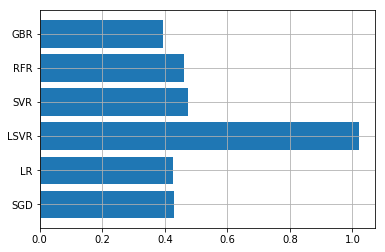

In [23]:
plt.grid()
plt.barh(range(len(class_names)),class_)
plt.yticks(range(len(class_names)), class_names);

### 04. Escolha o melhor algoritmo obtido a partir de cross validation e treine um modelo usando o dataset completo, ou seja, gere um modelo final.

In [24]:
model_finalGBR = GradientBoostingRegressor()
model_finalGBR.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

### 05. Qual a diferença entre Stochastic Gradient Descent e Gradient Descent? 

Batch gradient descent computes the gradient using the whole dataset. This is great for convex, or relatively smooth error manifolds. In this case, we move somewhat directly towards an optimum solution, either local or global. Additionally, batch gradient descent, given an annealed learning rate, will eventually find the minimum located in it's basin of attraction.

Stochastic gradient descent (SGD) computes the gradient using a single sample. Most applications of SGD actually use a minibatch of several samples, for reasons that will be explained a bit later. SGD works well (Not well, I suppose, but better than batch gradient descent) for error manifolds that have lots of local maxima/minima. In this case, the somewhat noisier gradient calculated using the reduced number of samples tends to jerk the model out of local minima into a region that hopefully is more optimal. Single samples are really noisy, while minibatches tend to average a little of the noise out. Thus, the amount of jerk is reduced when using minibatches. A good balance is struck when the minibatch size is small enough to avoid some of the poor local minima, but large enough that it doesn't avoid the global minima or better-performing local minima. (Incidently, this assumes that the best minima have a larger and deeper basin of attraction, and are therefore easier to fall into.)

One benefit of SGD is that it's computationally a whole lot faster. Large datasets often can't be held in RAM, which makes vectorization much less efficient. Rather, each sample or batch of samples must be loaded, worked with, the results stored, and so on. Minibatch SGD, on the other hand, is usually intentionally made small enough to be computationally tractable.

Usually, this computational advantage is leveraged by performing many more iterations of SGD, making many more steps than conventional batch gradient descent. This usually results in a model that is very close to that which would be found via batch gradient descent, or better.

O Gradiente descendente visa a minimização da função.

O termo estocástico vem do fato de que o gradiente baseado em uma única amostra de treinamento é uma aproximação estocástica do gradiente de custo verdadeiro. O gradiente descendente estocástico avalia e atualiza os coeficientes a cada iteração para minimizar o erro de um modelo.